<a href="https://colab.research.google.com/github/thaiassiaht/Capacita-Brasil-C-jovem---Ci-ncia-de-Dados/blob/main/modulo-avan%C3%A7ado/Oficina_5_Modelagem_dos_dados_de_im%C3%B3veis_para_previs%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
print(housing.head())
print("\n")
housing.info()
print("\n")
housing.isnull().sum()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  
0             6.984127  
1             6.23

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Questão 1: Análise exploratória de dados (EDA)

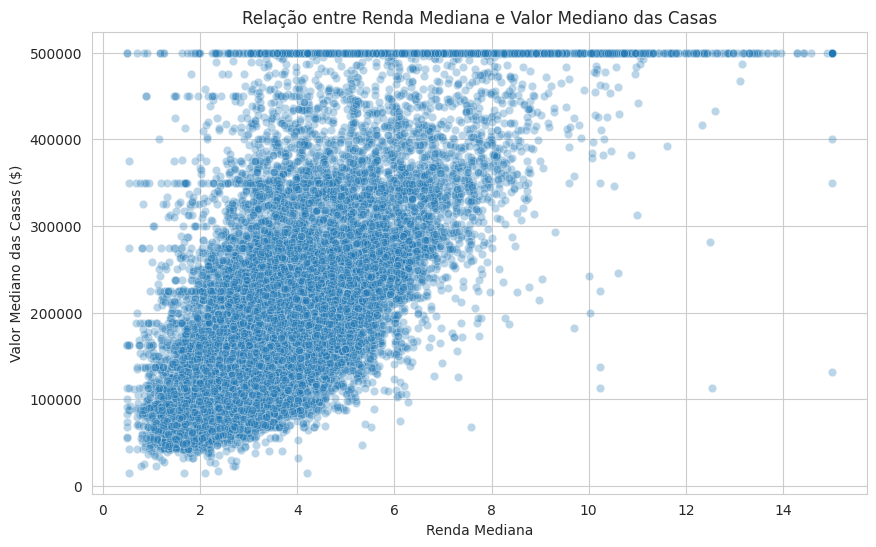

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing, alpha=0.3)
plt.title('Relação entre Renda Mediana e Valor Mediano das Casas')
plt.xlabel('Renda Mediana')
plt.ylabel('Valor Mediano das Casas ($)')
plt.show()

Questão 2: Divisão dos dados

In [ ]:
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Treino: {X_train.shape[0]} amostras e Teste: {X_test.shape[0]} amostras")

Treino: 14448 amostras e Teste: 6192 amostras


Questão 3: Análise de outliers


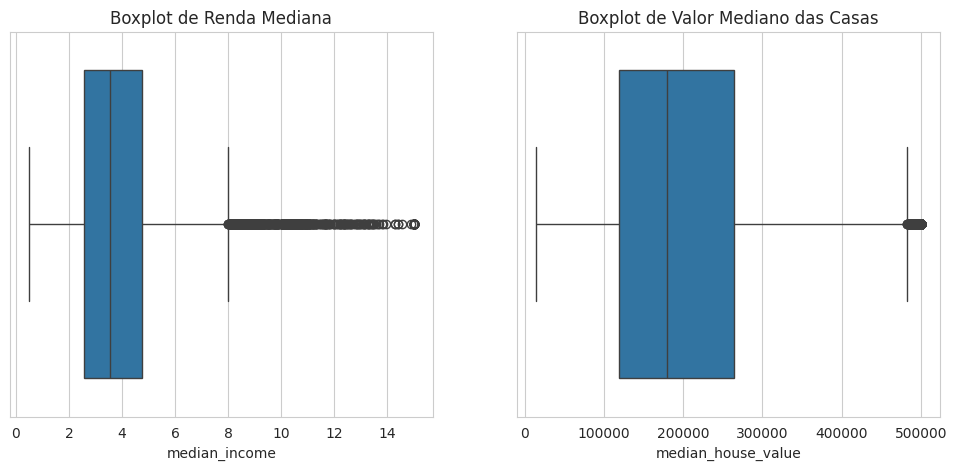

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=housing['median_income'])
plt.title('Boxplot de Renda Mediana')

plt.subplot(1, 2, 2)
sns.boxplot(x=housing['median_house_value'])
plt.title('Boxplot de Valor Mediano das Casas')
plt.show()

Questão 4: Seleção de variáveis (feature Selection)



In [ ]:
features = ['median_income', 'housing_median_age', 'rooms_per_household']
X = housing[features]
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"MAE (3 variáveis selecionadas): ${mae:.2f}")

MAE (3 variáveis selecionadas): $59680.47
